In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

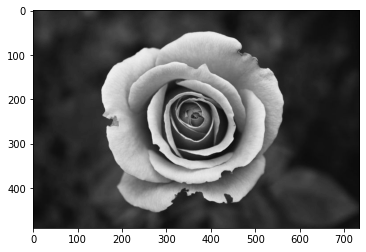

In [2]:
image = cv2.imread('flower.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap = 'gray')


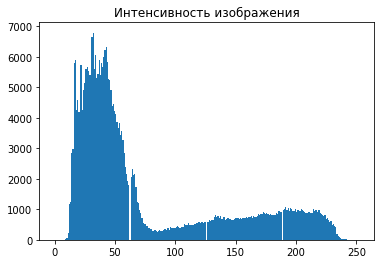

In [3]:
plt.hist(image.ravel(), bins = 256)
plt.title('Интенсивность изображения')
plt.show()

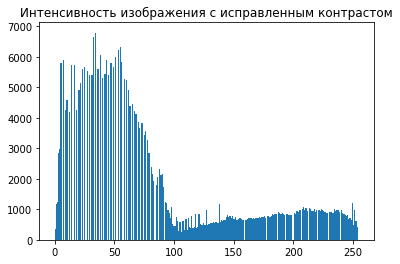

In [4]:
def Contrast_Enhancement(image, bins = 256):
    """
    The function enhances the contrast of the image.
    """
    
    flatten = image.flatten()
    frequency = np.zeros(bins)

    # Подсчитываем частоту каждого пикселя(сколько раз встречается)
    for i in image:
        frequency[i] += 1

    cum_sum = np.cumsum(frequency)
    norm = (cum_sum - cum_sum.min()) * 255

    n = cum_sum.max() - cum_sum.min()
    normal = norm / n
    normal = normal.astype('int')

    new_im = normal[flatten]
    
    # Возвращаем матрицу изображения в нормальный вид
    new_im = np.reshape(new_im, image.shape)

    return new_im


new_image = np.array(Contrast_Enhancement(image, 256), dtype = 'uint8')
plt.hist(new_image.ravel(), bins = 256)
plt.title('Интенсивность изображения c исправленным контрастом')
plt.show()


Text(0.5, 1.0, 'Исходное изображение')

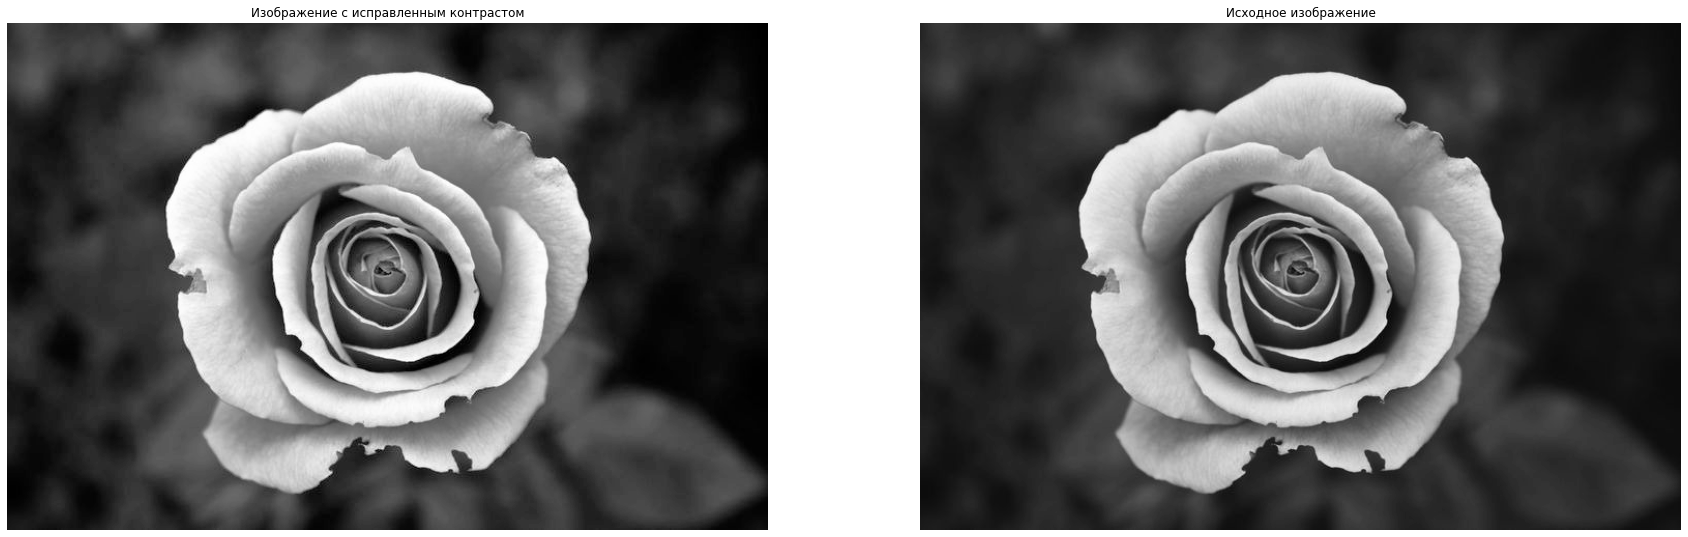

In [5]:
# Вывод двух изображений для сравнения
fig = plt.figure(figsize=(30, 30))

rows = 2
columns = 2
  

fig.add_subplot(rows, columns, 1)
  
plt.imshow(new_image, cmap = 'gray')
plt.axis('off')
plt.title("Изображение с исправленным контрастом")
  

fig.add_subplot(rows, columns, 2)
  
plt.imshow(image, cmap = 'gray')
plt.axis('off')
plt.title("Исходное изображение")

In [12]:
# В этой части кода подбираются пороги с помощью встроенных функций cv2, а также попытка подбором на глаз.

def set_treshold(threshold, sigma=0.33):
    
    """
    A function that calculates thresholds.
    """
    
    return 2/3 * threshold, 4/3 * threshold

image_blur = cv2.GaussianBlur(new_image, (5, 5), cv2.BORDER_DEFAULT)

# Метод Otsu
otsu, _ = cv2.threshold(image_blur, 0, 255, cv2.THRESH_OTSU)

# Метод треугольника
triangle, _ = cv2.threshold(image_blur, 0, 255, cv2.THRESH_TRIANGLE)

# Метод с помощью медианы
manual_thresh = np.median(image_blur)


otsu_withset = set_treshold(otsu)
triangle_withset = set_treshold(triangle)
manual_withset = set_treshold(manual)

# Вывод получившихся порогов с помощью разных методов.
print(otsu_withset)
print(triangle_withset)
print(manual_withset)

(77.33333333333333, 154.66666666666666)
(70.0, 140.0)
(41.33333333333333, 82.66666666666666)


Text(0.5, 1.0, 'Selection method')

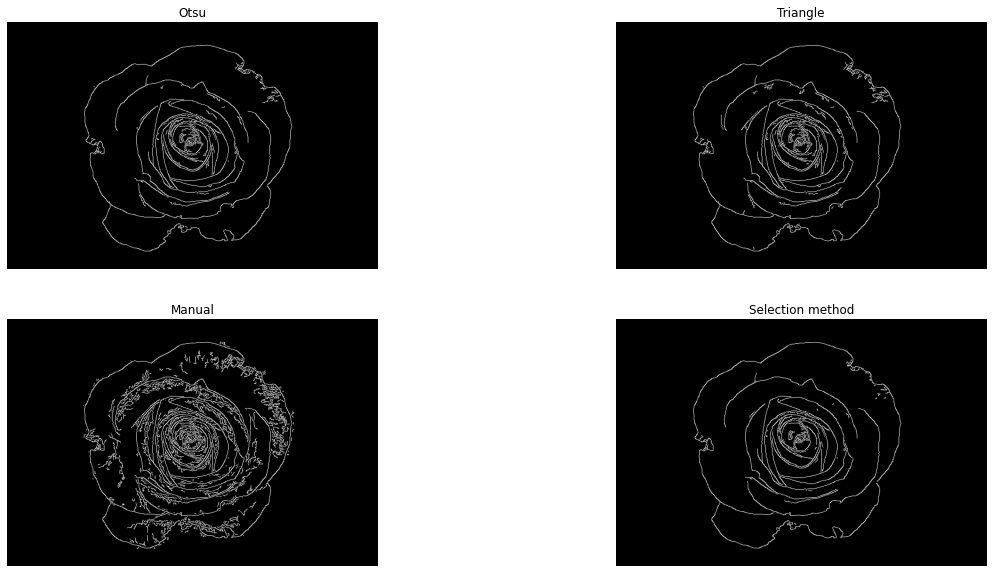

In [13]:
# Вывод для сравнения изображений с различными пороговыми значениями
fig = plt.figure(figsize=(20, 10))

rows = 2
columns = 2
  

fig.add_subplot(rows, columns, 1)
  
imageCannyNew = cv2.Canny(new_image, otsu_withset[0], otsu_withset[1])
plt.imshow(imageCannyNew, cmap = 'gray')
plt.axis('off')
plt.title("Otsu")
  

fig.add_subplot(rows, columns, 2)
  
imageCanny = cv2.Canny(new_image, triangle_withset[0], triangle_withset[1])
plt.imshow(imageCanny, cmap = 'gray')
plt.axis('off')
plt.title("Triangle")

fig.add_subplot(rows, columns, 3)
  
imageCanny = cv2.Canny(new_image, manual_withset[0], manual_withset[1])
plt.imshow(imageCanny, cmap = 'gray')
plt.axis('off')
plt.title("Manual")

fig.add_subplot(rows, columns, 4)
imageCanny = cv2.Canny(new_image, 110, 170)
plt.imshow(imageCanny, cmap = 'gray')
plt.axis('off')
plt.title("Selection method")